# Plot Scores for Columns of MSA

## Import and Clean Data

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

in_fh = r"D:\Orthologs\Ortholog_Codon_Dist\PTHR42792\P04949_ortholog_msa_scores3.data"

df = pd.read_csv(in_fh)

In [5]:
# remove columns with no information
df_clean = df[df.Identity != 'X']

print(len(df_clean), "columns used in analysis.\n")

# convert values in columns Percent ID and on to floats
df_clean[df_clean.columns[1:]] = df_clean[df_clean.columns[1:]].astype('float')
df_clean.dtypes

261 columns used in analysis.



Identity                  object
Percent Identity         float64
Avg Blosum62 Score       float64
Avg Frequency Score      float64
Fraction Aligned         float64
Fraction Disordered      float64
Avg Disorder Strength    float64
Avg Frequency Ratio      float64
dtype: object

## Distributions of Each Score

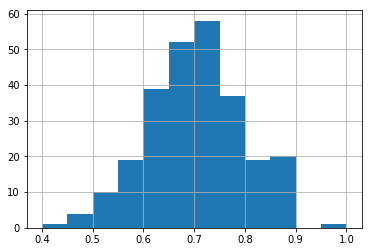

In [16]:
df_clean['Avg Frequency Score'].hist(bins = np.arange(0.4, 1.01, 0.05));

no column where, on avg, codon freq is lower than expected

c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


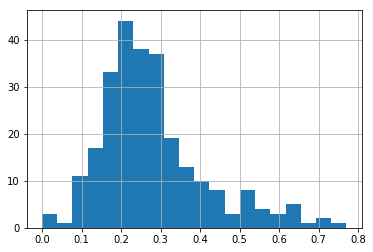

In [54]:
#df_clean['Avg Frequency Ratio'].hist(bins = 20)
df_clean['Log Avg Freq Ratio'] = np.log(df_clean['Avg Frequency Ratio'])
df_clean['Log Avg Freq Ratio'].hist(bins = 20);

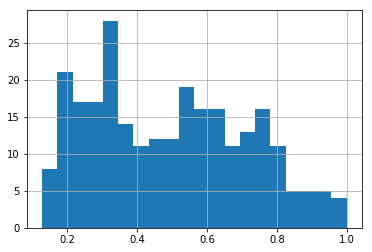

In [7]:
df_clean['Percent Identity'].hist(bins = 20);

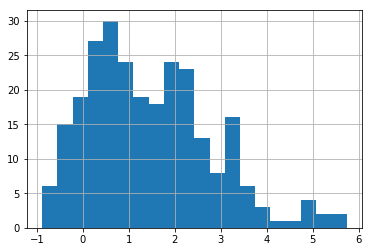

In [8]:
df_clean['Avg Blosum62 Score'].hist(bins = 20);

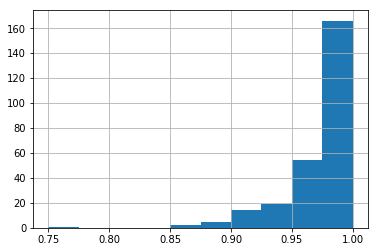

In [9]:
df_clean['Fraction Aligned'].hist();

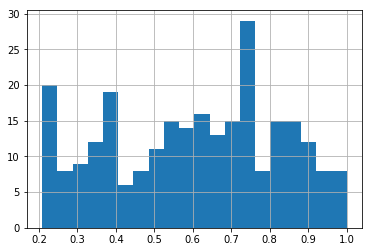

In [10]:
df_clean['Fraction Disordered'].hist(bins = 20);

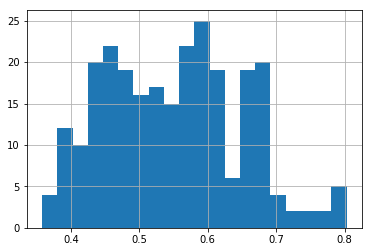

In [11]:
df_clean['Avg Disorder Strength'].hist(bins = 20);

## Plot Column Scores

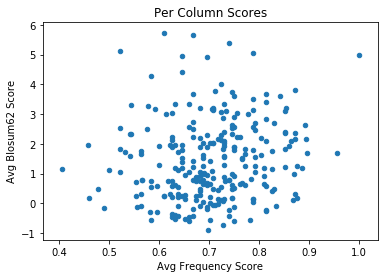

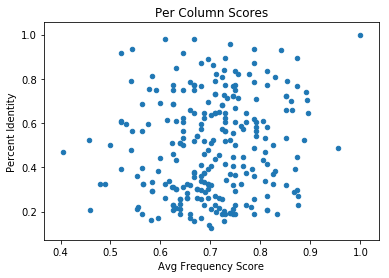

In [18]:
# matplotlib backend to plot dataframe columns
df_clean.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores');

Linear pattern emerges as ratio increases (less lower conserved residues with increasing ratio)

get boxplots for below data

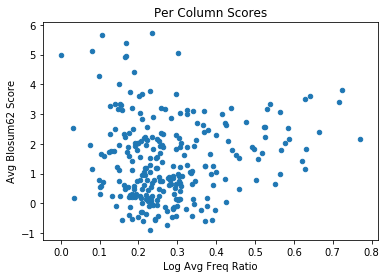

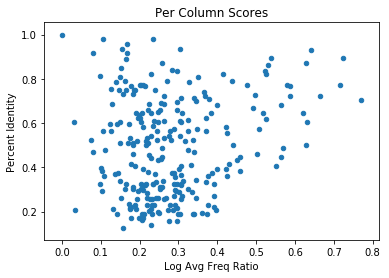

In [56]:
df_clean.plot.scatter('Log Avg Freq Ratio', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Log Avg Freq Ratio', 'Percent Identity', title='Per Column Scores');

Fraction Disorder Split at 50% for same scores above

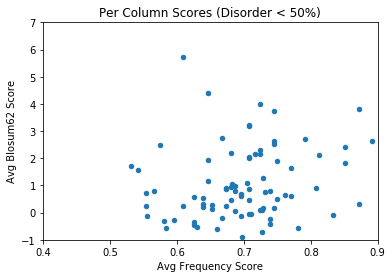

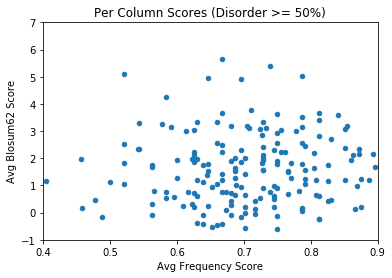

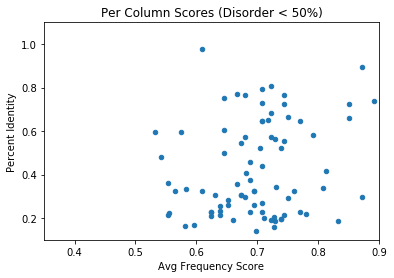

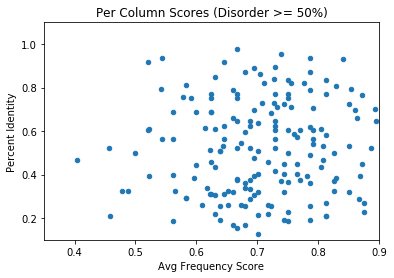

In [20]:
df_clean_dis1 = df_clean[df_clean['Fraction Disordered'] < 0.5]
df_clean_dis2 = df_clean[df_clean['Fraction Disordered'] >= 0.5]

df_clean_dis1.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder < 50%)')
plt.xlim([0.4, 0.9])
plt.ylim([-1, 7])
df_clean_dis2.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([0.4, 0.9])
plt.ylim([-1, 7])
df_clean_dis1.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder < 50%)')
plt.xlim([0.35, 0.9])
plt.ylim([0.1, 1.1])
df_clean_dis2.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([0.35, 0.9])
plt.ylim([0.1, 1.1]);

small diff using ratio, still no pattern seen

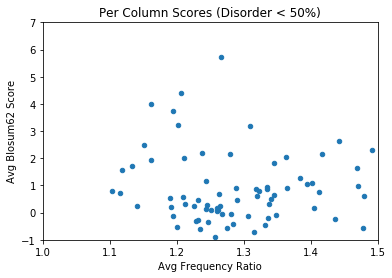

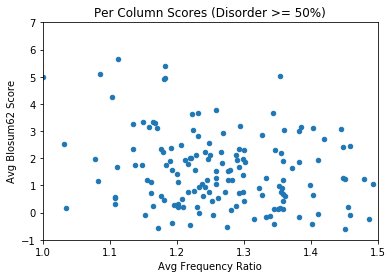

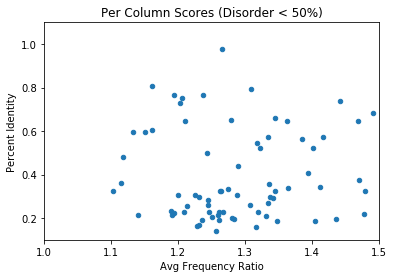

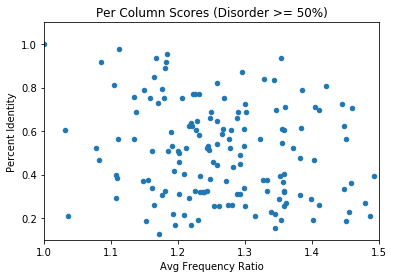

In [21]:
df_clean_dis1.plot.scatter('Avg Frequency Ratio', 'Avg Blosum62 Score', title='Per Column Scores (Disorder < 50%)')
plt.xlim([1.0, 1.5])
plt.ylim([-1, 7])
df_clean_dis2.plot.scatter('Avg Frequency Ratio', 'Avg Blosum62 Score', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([1.0, 1.5])
plt.ylim([-1, 7])
df_clean_dis1.plot.scatter('Avg Frequency Ratio', 'Percent Identity', title='Per Column Scores (Disorder < 50%)')
plt.xlim([1.0, 1.5])
plt.ylim([0.1, 1.1])
df_clean_dis2.plot.scatter('Avg Frequency Ratio', 'Percent Identity', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([1.0, 1.5])
plt.ylim([0.1, 1.1]);

Split at 50% Disorder Strength for same scores above (no diff as expected)

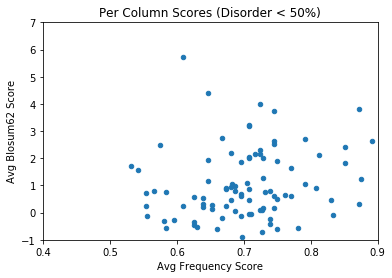

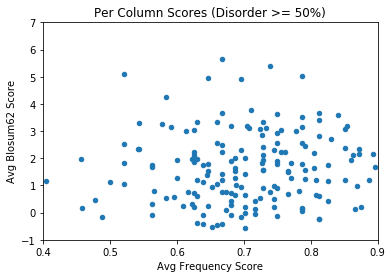

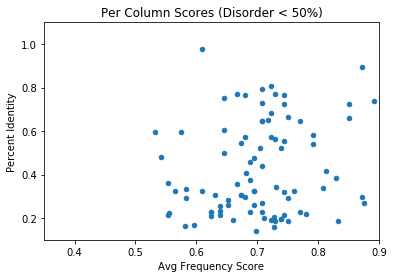

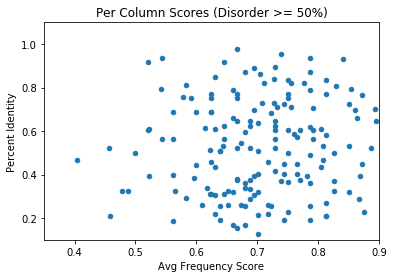

In [22]:
df_clean_strength1 = df_clean[df_clean['Avg Disorder Strength'] < 0.5]
df_clean_strength2 = df_clean[df_clean['Avg Disorder Strength'] >= 0.5]

df_clean_strength1.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder < 50%)')
plt.xlim([0.4, 0.9])
plt.ylim([-1, 7])
df_clean_strength2.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([0.4, 0.9])
plt.ylim([-1, 7])
df_clean_strength1.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder < 50%)')
plt.xlim([0.35, 0.9])
plt.ylim([0.1, 1.1])
df_clean_strength2.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder >= 50%)')
plt.xlim([0.35, 0.9])
plt.ylim([0.1, 1.1]);

no diff when plotting both new scores either

Attempting to filter by fraction aligned produced no differences (maybe shrink size of window)

In [23]:
print(min(df_clean['Fraction Aligned']))

0.75


In [24]:
df_clean_25 = df_clean[df_clean['Fraction Aligned'] <= 0.25]
df_clean_25

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio


In [25]:
df_clean_50 = df_clean[(df_clean['Fraction Aligned'] <= 0.50) & (df_clean['Fraction Aligned'] > 0.25)]
df_clean_50

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio


In [26]:
df_clean_75 = df_clean[(df_clean['Fraction Aligned'] <= 0.75) & (df_clean['Fraction Aligned'] > 0.50)]
df_clean_75

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio
336,x,0.333333,-0.561905,0.583333,0.75,0.222222,0.358129,1.275225


In [27]:
df_clean_100 = df_clean[(df_clean['Fraction Aligned'] <= 1.0) & (df_clean['Fraction Aligned'] > 0.75)]
df_clean_100

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered,Avg Disorder Strength,Avg Frequency Ratio
0,M,1.000000,5.000000,1.000000,0.916667,1.000000,0.802915,1.000000
63,R,0.325581,-0.170543,0.488372,0.895833,1.000000,0.795098,1.333293
64,I,0.613636,3.010571,0.613636,0.916667,1.000000,0.789348,1.383074
65,N,0.755556,3.269697,0.577778,0.937500,0.977778,0.771662,1.133738
66,T,0.688889,1.932323,0.600000,0.937500,0.888889,0.743916,1.290311
67,N,0.977778,5.644444,0.666667,0.937500,0.844444,0.716216,1.112597
68,V,0.288889,1.023232,0.688889,0.937500,0.777778,0.689128,1.399329
69,S,0.326087,0.472464,0.478261,0.958333,0.760870,0.674470,1.180193
70,A,0.521739,1.957488,0.456522,0.958333,0.760870,0.658984,1.077939
71,L,0.434783,1.631884,0.804348,0.958333,0.760870,0.655220,1.569729


## Distribution of Each Score Split at 50% Fraction Disorder

Not redoing with disorder strength since population changes were marginal compared to fraction disorder

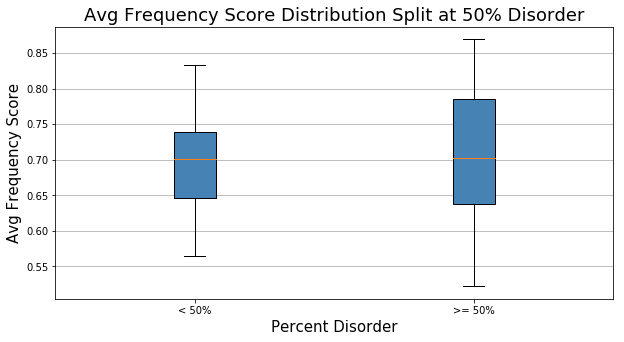

In [32]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_dis1["Avg Frequency Score"], df_clean_dis2["Avg Frequency Score"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2], ["< 50%", ">= 50%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Score Distribution Split at 50% Disorder', fontsize=18);


Using Freq ratio (virtually no different between groups, as seen with score above)

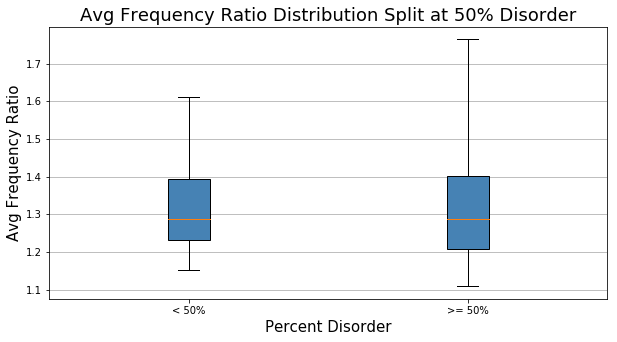

In [33]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_dis1["Avg Frequency Ratio"], df_clean_dis2["Avg Frequency Ratio"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2], ["< 50%", ">= 50%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Ratio", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Ratio Distribution Split at 50% Disorder', fontsize=18);


as disorder increases, conservation increases (seen in both below, should t-test)

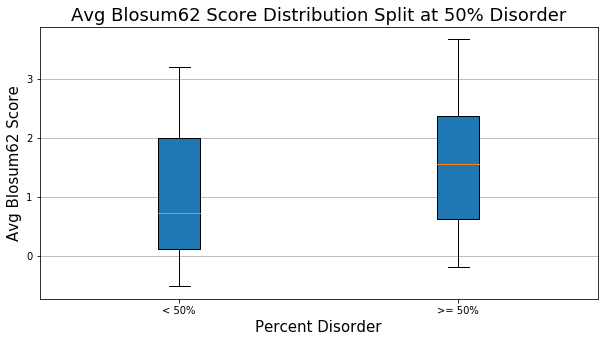

In [34]:
plt.figure(figsize=(10, 5))
plt.grid(True, axis='y')

boxplot = plt.boxplot([df_clean_dis1['Avg Blosum62 Score'], df_clean_dis2['Avg Blosum62 Score']], whis=[5, 95], showfliers=False,
                      patch_artist=True)

plt.xticks([1,2], ["< 50%", ">= 50%"])
plt.ylabel('Avg Blosum62 Score', fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Blosum62 Score Distribution Split at 50% Disorder', fontsize=18);

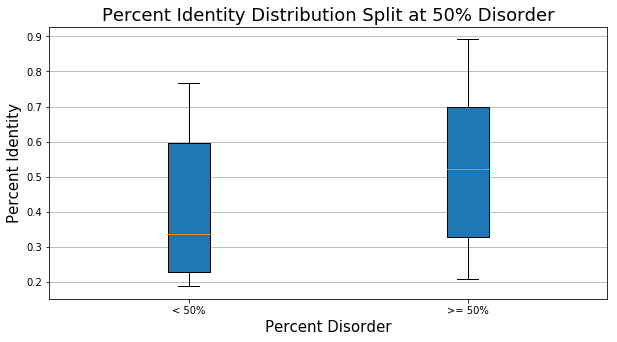

In [35]:
plt.figure(figsize=(10, 5))
plt.grid(True, axis='y')

boxplot = plt.boxplot([df_clean_dis1['Percent Identity'], df_clean_dis2['Percent Identity']], whis=[5, 95], showfliers=False,
                      patch_artist=True)

plt.xticks([1,2], ["< 50%", ">= 50%"])
plt.ylabel('Percent Identity', fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Percent Identity Distribution Split at 50% Disorder', fontsize=18);

## Plot Scores as a Function of Disorder

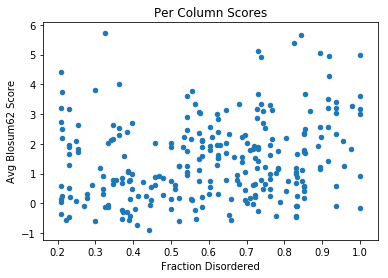

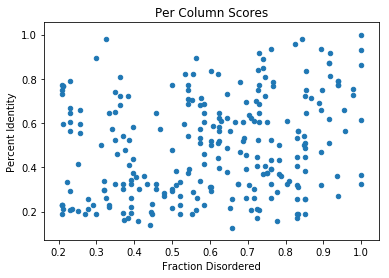

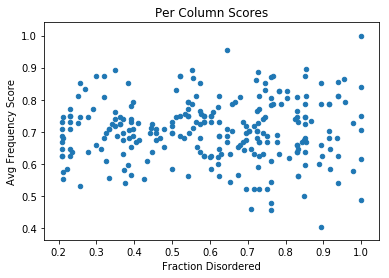

In [36]:
df_clean.plot.scatter('Fraction Disordered', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Fraction Disordered', 'Percent Identity', title='Per Column Scores')
df_clean.plot.scatter('Fraction Disordered', 'Avg Frequency Score', title='Per Column Scores');

hardly any changes (as expected)

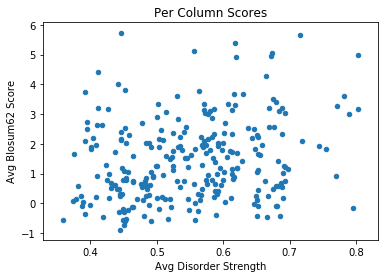

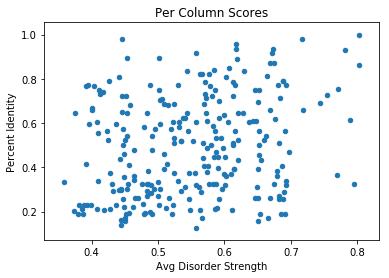

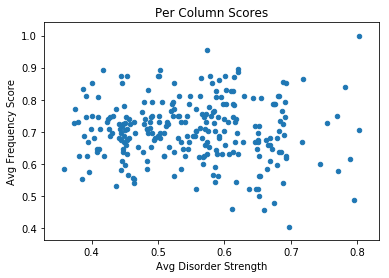

In [38]:
df_clean.plot.scatter('Avg Disorder Strength', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Avg Disorder Strength', 'Percent Identity', title='Per Column Scores')
df_clean.plot.scatter('Avg Disorder Strength', 'Avg Frequency Score', title='Per Column Scores');

## Fraction Disorder Filters

In [57]:
df_clean_25d = df_clean[df_clean['Fraction Disordered'] <= 0.25]
len(df_clean_25d)

22

In [58]:
df_clean_50d = df_clean[(df_clean['Fraction Disordered'] <= 0.50) & (df_clean['Fraction Disordered'] > 0.25)]
len(df_clean_50d)

65

In [59]:
df_clean_75d = df_clean[(df_clean['Fraction Disordered'] <= 0.75) & (df_clean['Fraction Disordered'] > 0.50)]
len(df_clean_75d)

101

In [60]:
df_clean_100d = df_clean[(df_clean['Fraction Disordered'] <= 1.0) & (df_clean['Fraction Disordered'] > 0.75)]
len(df_clean_100d)

73

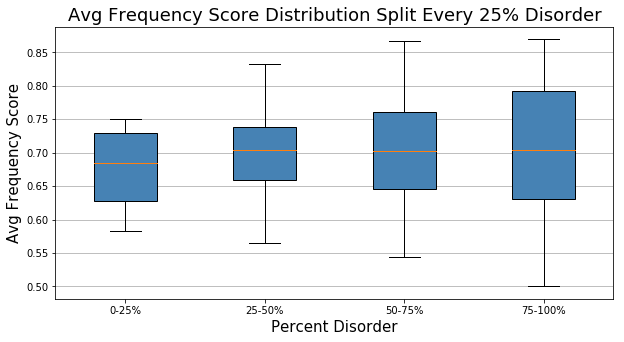

In [61]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Avg Frequency Score"], df_clean_50d["Avg Frequency Score"], df_clean_75d["Avg Frequency Score"],
                       df_clean_100d["Avg Frequency Score"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Score Distribution Split Every 25% Disorder', fontsize=18);


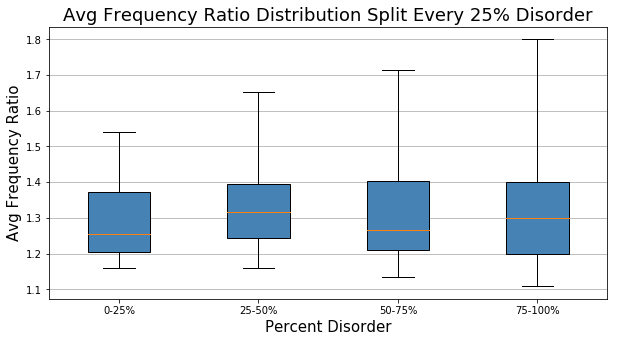

In [62]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Avg Frequency Ratio"], df_clean_50d["Avg Frequency Ratio"], df_clean_75d["Avg Frequency Ratio"],
                       df_clean_100d["Avg Frequency Ratio"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Ratio", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Ratio Distribution Split Every 25% Disorder', fontsize=18);


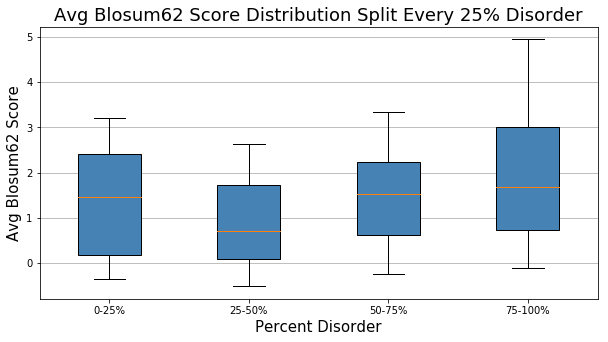

In [63]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Avg Blosum62 Score"], df_clean_50d["Avg Blosum62 Score"], df_clean_75d["Avg Blosum62 Score"],
                       df_clean_100d["Avg Blosum62 Score"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Blosum62 Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Blosum62 Score Distribution Split Every 25% Disorder', fontsize=18);


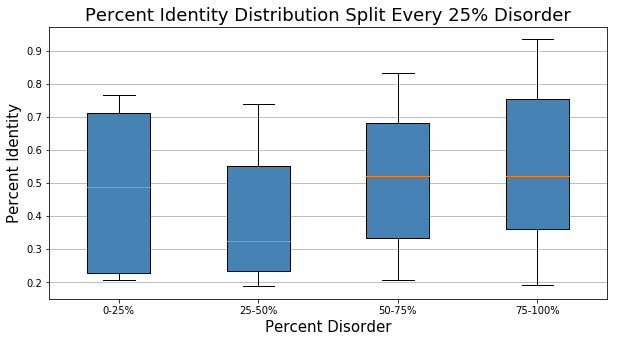

In [64]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Percent Identity"], df_clean_50d["Percent Identity"], df_clean_75d["Percent Identity"],
                       df_clean_100d["Percent Identity"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Percent Identity", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Percent Identity Distribution Split Every 25% Disorder', fontsize=18);


## Disorder Strength Filters

In [43]:
df_clean_25d = df_clean[df_clean['Avg Disorder Strength'] <= 0.25]
len(df_clean_25d)

0

In [44]:
df_clean_50d = df_clean[(df_clean['Avg Disorder Strength'] <= 0.50) & (df_clean['Avg Disorder Strength'] > 0.25)]
len(df_clean_50d)

90

In [45]:
df_clean_75d = df_clean[(df_clean['Avg Disorder Strength'] <= 0.75) & (df_clean['Avg Disorder Strength'] > 0.50)]
len(df_clean_75d)

163

In [46]:
df_clean_100d = df_clean[(df_clean['Avg Disorder Strength'] <= 1.0) & (df_clean['Avg Disorder Strength'] > 0.75)]
len(df_clean_100d)

8

Score distributions split by 25% using strength

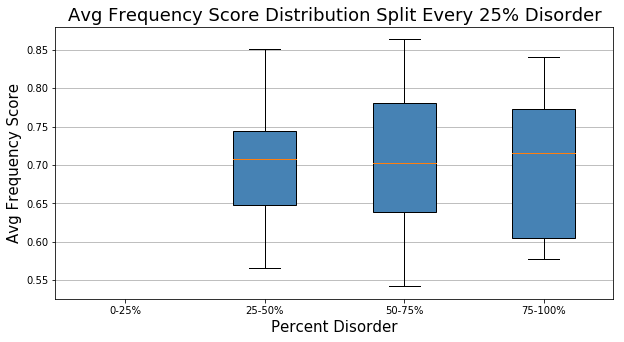

In [47]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Avg Frequency Score"], df_clean_50d["Avg Frequency Score"], df_clean_75d["Avg Frequency Score"],
                       df_clean_100d["Avg Frequency Score"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Score Distribution Split Every 25% Disorder', fontsize=18);


drop in freq ratio compare to score is seen here as well as 50% split, but overall no diff across splits (ratio top quarter higher than others by almost 0.1)

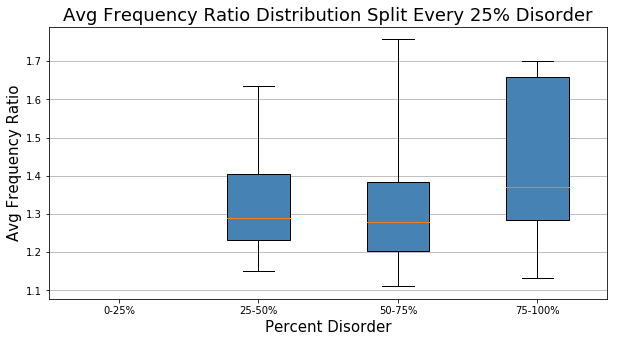

In [48]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Avg Frequency Ratio"], df_clean_50d["Avg Frequency Ratio"], df_clean_75d["Avg Frequency Ratio"],
                       df_clean_100d["Avg Frequency Ratio"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Ratio", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Ratio Distribution Split Every 25% Disorder', fontsize=18);


conservation increases as disorder increases (why not seeing that in scatter plots?)

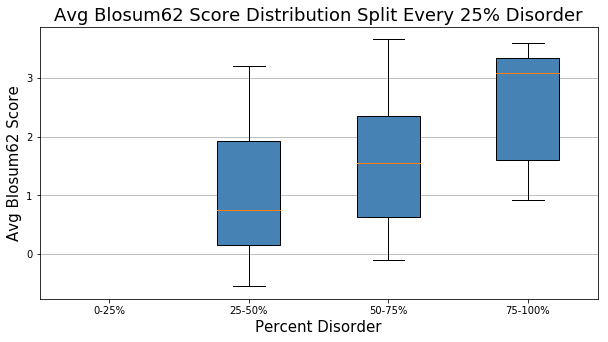

In [49]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Avg Blosum62 Score"], df_clean_50d["Avg Blosum62 Score"], df_clean_75d["Avg Blosum62 Score"],
                       df_clean_100d["Avg Blosum62 Score"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Blosum62 Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Blosum62 Score Distribution Split Every 25% Disorder', fontsize=18);


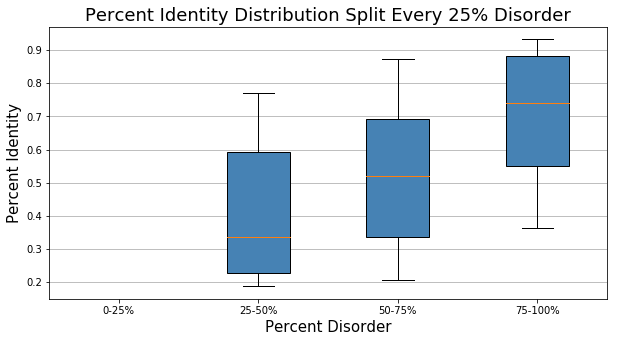

In [50]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_25d["Percent Identity"], df_clean_50d["Percent Identity"], df_clean_75d["Percent Identity"],
                       df_clean_100d["Percent Identity"]], whis=[5, 95], showfliers=False, patch_artist=True, 
                       boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2,3,4], ["0-25%","25-50%", "50-75%", "75-100%"])
#plt.yticks(fontsize=12)
plt.ylabel("Percent Identity", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Percent Identity Distribution Split Every 25% Disorder', fontsize=18);
